# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>PABLO RAMBLADO CARRASCO</mark>

Importamos el modelo "resnet18".

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━

In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color='#ADD8E6'>**Ejercicio 4: Primeros pasos de IA explicable aplicada a redes neuronales convolucionales (1,5 puntos)**
<font color='#ADD8E6'>En este ejercicio trabajaremos con el conjunto de datos Caltech-UCSD Birds-200-2011 (https://www.vision.caltech.edu/datasets/cub_200_2011/). Este conjunto de datos consta de $11788$ imágenes de $200$ especies de aves diferentes. Tiene $200$ clases, con $5994$ para entrenamiento y $5794$ para pruebas. El $10\%$ del conjunto de entrenamiento se dejará para validación.

<font color='#ADD8E6'>Usaremos el modelo de red ResNet18 ya preentrenado con ImageNet, que se puede descargar desde el repositorio de modelos de fastai. Se realizará un fine-tuning de toda la red (por $10$ épocas) tras haber incorporado una cabecera adecuada para este problema (con una única fully-connected layer). Es decir, se debe hacer algo similar a lo realizado en el apartado cuarto del ejercicio 3.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)

/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 60 59 50 60 60 60 53 59 60 60 60 60 60 60 41 60 60 60 59 59 60 60 45 60 60 44 60 60 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 59 60 59 60 60 60 60 58 60 60 60 60 60 50 59 59 60 60 60 60 60 60 60 60 60 58 60 60 59 59 60 60 60 60 48 60 60 58 59 60 60 49 60 60 60 60 60 59 50 60 59 59 60 60 60 60 57 59 60 60 60 50 60 60 59 60 60 60 60 56 58 60 60 60 60 56 59 58 53 60 60 60 60 60 60 59 60 59 60 60 51 56 60 60 59 60 60 60 60 60 59 60 60 60 60 60 52 60 57 58 60 59 60 60 60 60 59 60 60 60 60 60 59 60 60 60 60 60 59 60 59 59 60 53 60 60 60 60 59 60 59 60 60 60 60 60 60 60 60 60 60 60 

In [ ]:
#Ahora tenemos en images_list la lista con todas las imágenes, y en train_test_split cuáles pertenecen a training (1) o a test (0)
# Vamos a crear dos carpetas: una train y otra test, y vamos a meter dentro las imágenes correspondientes
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')

/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/098.Scott_Oriole'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/195.Carolina_Wren'), Path('/root/.fastai/data/CUB_200_2011/train/165.Chestnut_sided_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/142.Black_Tern'), Path('/root/.fastai/data/CUB_200_2011/train/129.Song_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/023.Brandt_Cormorant'), Path('/root/.fastai/data/CUB_200_2011/train/113.Baird_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/086.Pacific_Loon'), Path('/root/.fastai/data/CUB_200_2011/train/120.Fox_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/002.Laysan_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/032.Mangrove_Cuckoo'), Path('/root/.fastai/data/CUB_200_2011/train/009.Brewer_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/183.Northern_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/038.Great_Crested_Fly

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  5994
Total test images:  5794


Utilizamos el mismo DataBlock del ejercicio anterior, pero realizando dos cambios. Primero, cambiamos la función `get_y` para que obtenga las etiquetas correctamente. Segundo, redimensionamos las imagenes para garantizar que todas las tengan el mismo tamaño, lo que evita el error relacionado con las imágenes de diferentes dimensiones al intentar agruparlas en lotes.

Numero de ejemplos de entrenamiento (una vez descartados los de validacion): 5395
Numero de ejemplos de validacion: 599


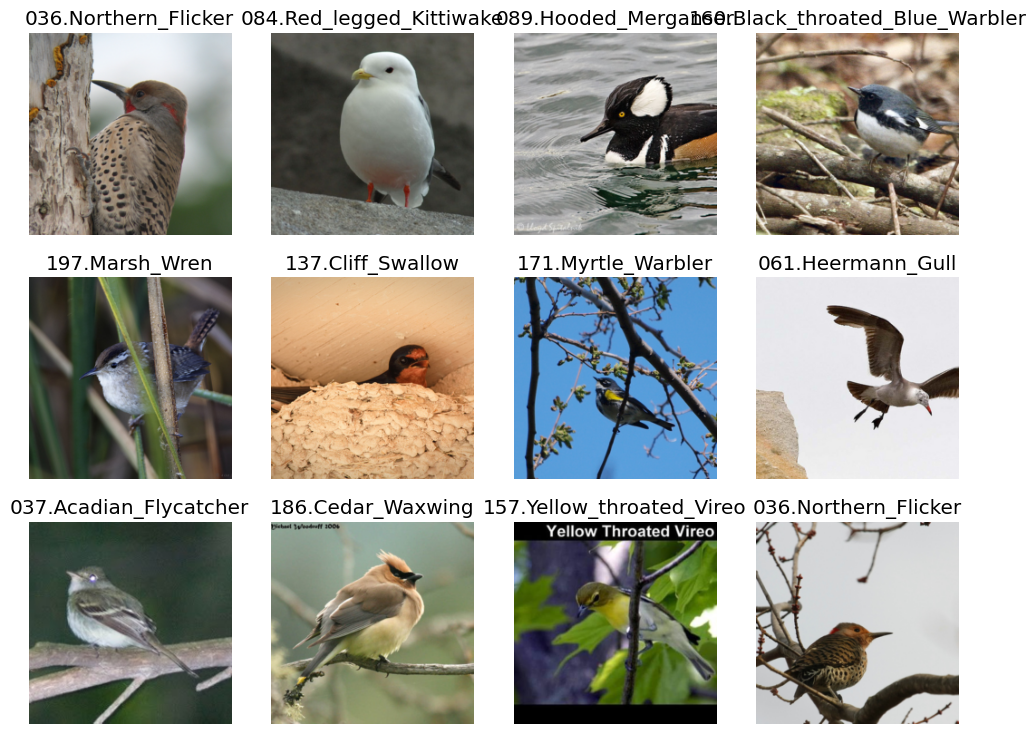

In [ ]:
CUB_200_2011 = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.1, seed=42),
  get_y=parent_label,
  item_tfms=Resize(224),  # Redimensionar las imágenes a 224x224 píxeles
)

dls = CUB_200_2011.dataloaders(path/'train')

dls.show_batch(max_n=12)

print('Numero de ejemplos de entrenamiento (una vez descartados los de validacion):', len(dls.train_ds))
print('Numero de ejemplos de validacion:', len(dls.valid_ds))

Aqui hacemos lo mismo que en el ejercicio anterior.
- Crear la cabecera con 1 salida
- Ajustar el learner con los pesos preentrenados
- Congelar el modelo base menos la cabecera

Hay que tener en cuenta que la arquitectura de Resnet18 es la siguiente:

<img src="https://www.researchgate.net/publication/366608244/figure/fig1/AS:11431281109643320@1672145338540/Structure-of-the-Resnet-18-Model.jpg">

En esta arquitectura, la penúltima capa es una convolucional que genera una salida de 512 canales. Esta salida pasa por la operación de Global Average Pooling, que reduce cada mapa de características a un solo valor, produciendo una salida de tamaño 512x1x1. Luego, se hace un flattening y este vector se pasa a una capa completamente conectada, que originalmente tiene 1000 neuronas, correspondientes al número de clases en ImageNet. Para adaptarla a nuestro problema de clasificación con 200 clases (especies de aves), sustituimos esta capa final por otra que genere 200 salidas.

En el ejercicio anterior usamos MSELossFlat ya que estabamos intentando resolver un problema de regresión. Pero ahora, en este ejercicio, estamos tratando con un problema de clasificación como ya vimos en los primeros ejercicios. Por ende usaremos `CrossEntropyLossFlat`.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 76.7MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

0.0004786300996784121


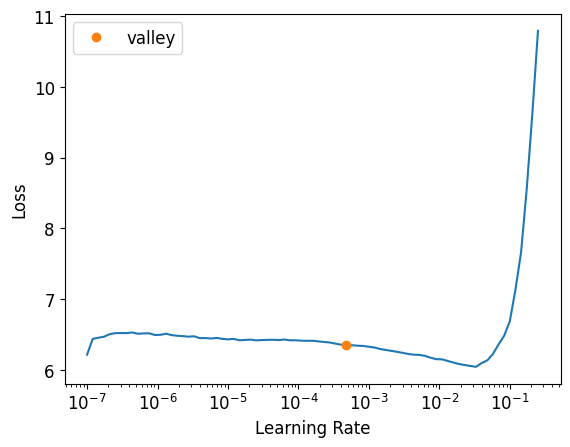

In [ ]:
# Cambiar la última capa para obtener 1 salida
custom_head = nn.Sequential(
    nn.AdaptiveAvgPool2d(1),
    nn.Flatten(),
    nn.Linear(512, 200)
)

# Crear el Learner con la cabecera personalizada
learn = vision_learner(
    dls,
    fastai.vision.models.resnet18,
    pretrained=True,
    train_bn=False,
    custom_head=custom_head,
    loss_func=CrossEntropyLossFlat(),
    metrics=accuracy
)

lr = learn.lr_find()
print(lr[0])

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
ReLU                      

Hacemos el fine-tuning por 10 épocas, donde la primera entrena la cabecera y el resto descongela el modelo para entrenarlo entero.

In [ ]:
learn.fine_tune(10, base_lr=lr[0])

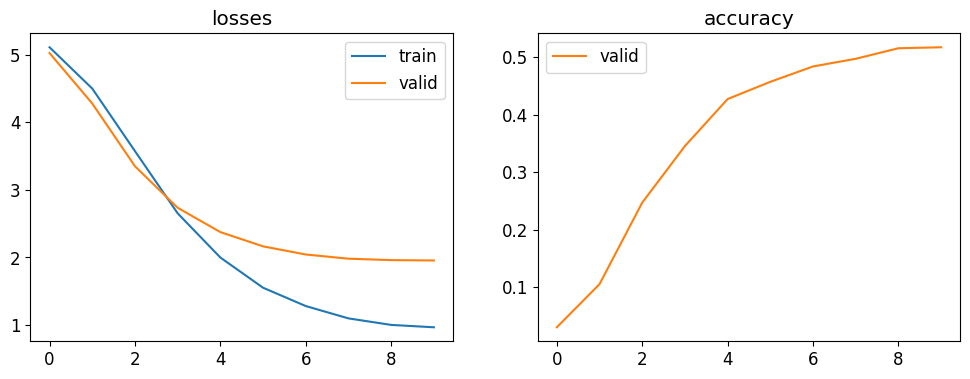

In [ ]:
learn.recorder.plot_metrics()

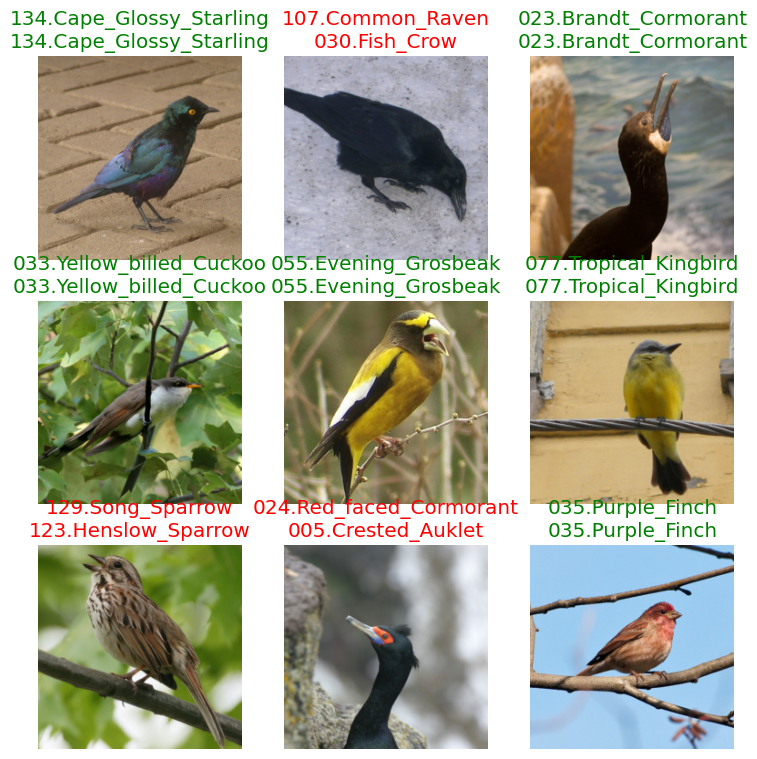

In [ ]:
learn.show_results()

## <font color='#ADD8E6'> Uso de GradCAM para analizar el comportamiento de redes convolucionales

<font color='#ADD8E6'> Una vez entrenado el modelo, se debe aplicar Grad-CAM para visualizar los mapas de activación del último bloque convolucional. Para ello, los alumnos deben emplear el paquete `grad-cam`: `!pip install grad-cam`. Se trata de una librería con métodos del estado del arte para dotar de explicabilidad a modelos de visión por computador. Se recomienda encarecidamente revisar con calma la documentación relativa a dicho paquete (https://jacobgil.github.io/pytorch-gradcam-book/introduction.html y https://github.com/jacobgil/pytorch-grad-cam) y basarse en los ejemplos allí indicados de cara a realizar la implementación. El alumnado debe emplear Grad-CAM con, al menos, $5$ imágenes de test, así como interpretar los resultados obtenidos.

<font color='#ADD8E6'> ¿En qué consiste Grad-CAM: cómo funciona y para qué sirve?


<font color='#ADD8E6'> Referencia: https://arxiv.org/pdf/1610.02391.pdf

Grad-CAM (Gradient-weighted Class Activation Mapping) es una técnica de visualización diseñada para mostrar las decisiones tomadas por redes neuronales convolucionales. Esta permite generar mapas de activación que destacan las zonas importantes de una imagen que contribuyen a la predicción de una clase específica. Al visualizar estos mapas, se puede observar cómo el modelo está tomando decisiones sobre las características de la imagen, mejorando la transparencia y comprensión de su funcionamiento.

El funcionamiento de Grad-CAM se basa en el cálculo de los gradientes de la clase objetivo con respecto a la última capa convolucional del modelo. Estos gradientes se utilizan para ponderar los mapas de activación de dicha capa, lo que permite generar un mapa de calor que resalta las áreas más relevantes de la imagen. Al aplicar estos gradientes a las activaciones de la capa final, se produce una visualización que indica qué partes de la imagen fueron cruciales para que el modelo tomara su decisión.

Grad-CAM es útil para mejorar la interpretabilidad de los modelos, permitiendo entender las decisiones del mismo. Esta técnica facilita el diagnóstico de errores, ya que permite verificar si el modelo está enfocándose o no en las características correctas de la imagen. Además, puede ayudar a detectar sesgos en los modelos y garantizar que estén generalizando correctamente. En clasificación de imágenes, ayuda a identificar áreas críticas y a mejorar la confianza de los usuarios en las predicciones del modelo.

In [ ]:
!pip install grad-cam
from pytorch_grad_cam import GradCAM

Primero, seleccionamos la capa convolucional específica de ResNet18 donde se van a calcular las activaciones.

- `learn.model[0]` hace referencia a la parte convolucional de la red ResNet18. Incluye todas las capas convolucionales y de pooling, sin contar la cabeza personalizada que añadimos anteriormente. Como ya se explicó, es la capa responsable de extraer las caracteristicas.

- `learn.model[0][6]` hace referencia a la capa `layer4`, que si volvemos a mirar en la imagen de la arquitectura, este modelo tiene varias capas convolucionales distribuidas en bloques. Por ende, `layer4` es la última capa convolucional (<font color="green;"> bloque de color verde</font>) antes de que los datos pasen por nuestra cabecera.

<img src="https://www.researchgate.net/publication/366608244/figure/fig1/AS:11431281109643320@1672145338540/Structure-of-the-Resnet-18-Model.jpg">

In [ ]:
# Acceder a la parte convolucional de ResNet18 antes de la cabeza personalizada
target_layer = learn.model[0][6]

Ahora, creamos un objeto de la clase `GradCAM`, configurado para analizar las activaciones de una capa específica del modelo de ResNet18. En este caso, se pasa como argumento el modelo completo (`learn.model`) y se especifica como *target layer* la capa convolucional `target_layer` anteriormente creada. Así Grad-CAM generará mapas de activación basados en las salidas de esa capa, ya que es donde se encuentran las características más relevantes antes de la clasificación.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import cv2

# Crear el objeto Grad-CAM para analizar las activaciones
grad_cam = GradCAM(model=learn.model, target_layers=target_layer)

# Crear el Dataloader de los datos de prueba
test_dls = CUB_200_2011.dataloaders(path/'test')

El propósito del proceso es generar mapas de activación con Grad-CAM para las primeras cinco imágenes del conjunto de validación (*test_dls.valid_ds*). Estos mapas resaltan las regiones de la imagen que el modelo considera más relevantes al hacer sus predicciones, lo que ayuda a interpretar visualmente el comportamiento del modelo. Para ello, es fundamental preparar correctamente los datos, calcular los mapas de activación, ajustar su tamaño para coincidir con la imagen original y visualizarlos de manera clara y superpuesta a la imagen base.

Primero iteramos sobre las primeras cinco imágenes del conjunto de validación (`test_dls.valid_ds`).Utilizamos Grad-CAM para generar mapas de activación que destacan las regiones de mayor relevancia para las predicciones del modelo :


1. **Transformación de la imagen al formato tensorial esperado**: Cada imagen se convierte a tensor utilizando `transforms.ToTensor()`.  Esto es necesario porque PyTorch y Grad-CAM trabajan con datos en formato tensorial, donde los valores de los píxeles están normalizados (generalmente entre 0 y 1) y organizados en dimensiones específicas. Asi nos aseguramos de que las imágenes tengan el formato correcto esperado por el modelo.


2. **Añadir una dimensión extra para formar un lote**: Luego, `unsqueeze(0)` añade una dimensión extra al tensor, convirtiendo la imagen de formato `(canales, alto, ancho)` a `(1, canales, alto, ancho)`, ya que los modelos procesan las entradas en forma de lotes, incluso cuando contienen una sola imagen.


3. **Procesamiento del mapa de activación y de la imagen para visualización**: Una vez que la imagen se ha convertido en tensor y se ha ajustado para formar un lote, el objeto Grad-CAM genera un mapa de activación que resalta las regiones de la imagen más importantes para la predicción del modelo. Este mapa es un tensor multidimensional, por lo que para visualizarlo correctamente, se selecciona la primera capa de activación con `grad_cam_map[0, :, :]`. Esto extrae la primera imagen del lote y luego obtiene el mapa de activación 2D, donde se muestran el resultado de la predicción. Asi convertimos el mapa de activación a un formato manejable.


4. **Conversión de la imagen al formato compatible para visualización**: Ahora la imagen debe convertirse a un arreglo visualmente interpretable, ya que los tensores aunque son útiles para los cálculos del modelo, no son compatibles con herramientas de visualización como Matplotlib. Al convertir el tensor a un arreglo `numpy` y reorganizar sus dimensiones al formato estándar HWC (alto, ancho, canales), aseguramos que la imagen pueda ser visualizada correctamente junto con el mapa de activación.. Esto se logra con `image_tensor[0].numpy().transpose(1, 2, 0)`:
  - `[0]`: Eextrae la única imagen del lote (lote de tamaño 1 creado anteriormente con unsqueeze(0)).
  - `.numpy()`: Se convierte el tensor de PyTorch en un arreglo numpy, el formato tradicionalmente usado.
  - `.transpose(1, 2, 0)`: Cambia el orden de las dimensiones de CHW (canales, alto, ancho) a HWC (alto, ancho, canales), el estándar para visualizar imágenes.


5. **Redimensionar el mapa de activación**: Este mapa de activación se ajusta al tamaño de la imagen original utilizando `cv2.resize`, permitiendo que se pueda superponer correctamente sobre la imagen.


6. **Superposición del mapa y la imagen**: Finalmente, se visualizan tanto la imagen como el mapa de activación superpuesto utilizando Matplotlib. Se emplea una transparencia (`alpha=0.5`) para fusionar la imagen original con el mapa, y se incluye una barra de colores que indica la intensidad de activación. Esto proporciona una representación visual de las regiones importantes para el modelo al tomar decisiones.

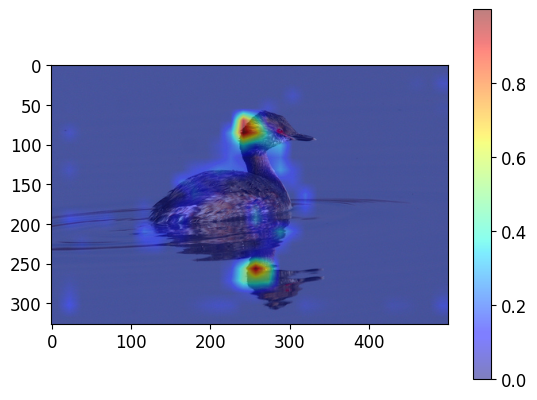

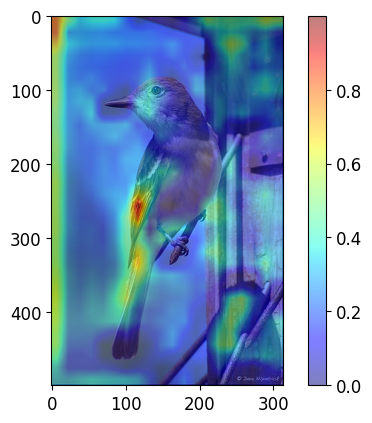

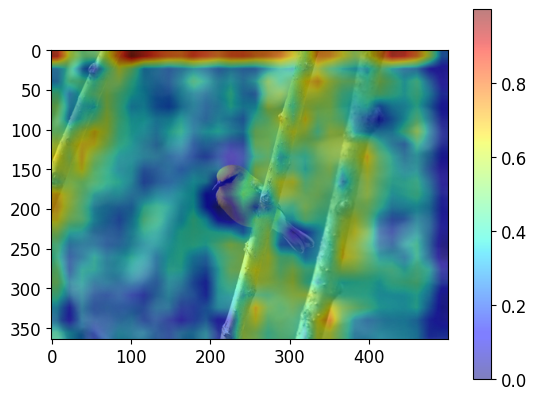

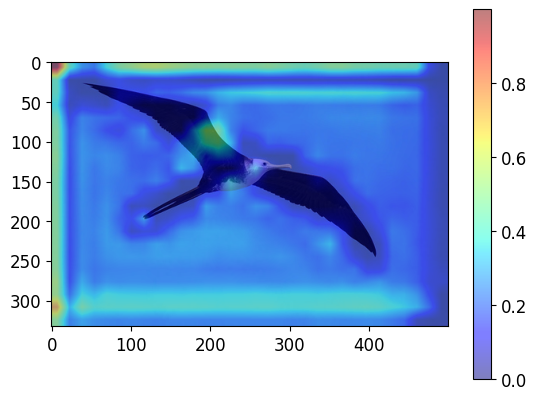

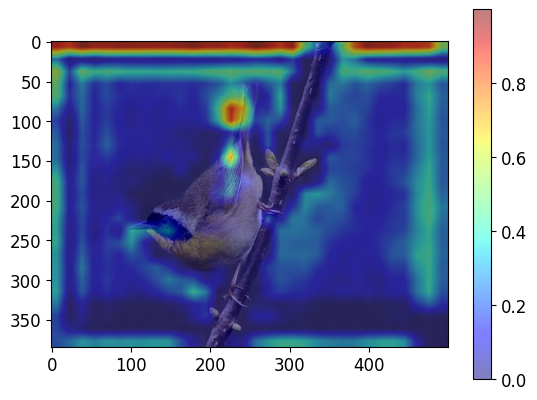

In [ ]:
# Generar los mapas de activación para las primeras 5 imágenes
for image, label in test_dls.valid_ds[:5]:
    # Convertir la imagen a tensor
    transform = transforms.ToTensor()
    image_tensor = transform(image).unsqueeze(0)  # Asegurar que la imagen tenga la forma adecuada para Grad-CAM

    # Obtener el mapa de activación de Grad-CAM
    grad_cam_map = grad_cam(image_tensor)

    grad_cam_map = grad_cam_map[0, :, :]  # Seleccionar la primera capa de activación
    image_np = image_tensor[0].numpy().transpose(1, 2, 0)  # Convertir la imagen a formato HWC (alto, ancho, canales)

    # Redimensionar el mapa de activación para que coincida con el tamaño de la imagen
    grad_cam_map_resized = cv2.resize(grad_cam_map, (image_np.shape[1], image_np.shape[0]))

    plt.imshow(image_np)  # Mostrar la imagen original
    plt.imshow(grad_cam_map_resized, cmap='jet', alpha=0.5)  # Superponer el mapa de activación
    plt.colorbar()  # Mostrar la barra de colores para el mapa
    plt.show()

### **RESULTADOS OBTENIDOS PRIMERA IMAGEN**

La imagen obtenida mediante Grad-CAM muestra un mapa de calor superpuesto a la imagen original de un pájaro en el agua, donde los colores indican las áreas más relevantes para la decisión de clasificación del modelo. Las zonas en rojo y naranja indican las regiones con mayor importancia, que en este caso parecen centrarse en la cabeza y el cuello del pájaro. Esto sugiere que el modelo ha aprendido a asociar estas características con la clase "pájaro", lo cual es un comportamiento esperado y correcto en la clasificación. Las áreas en amarillo y verde muestran una relevancia moderada, señalando que también contribuyen al razonamiento del modelo, aunque de forma secundaria. Las zonas en azul oscuro indican las áreas con menor importancia, como el fondo del agua, que el modelo ignora al centrarse en el objeto principal.

En general, el mapa de activación sugiere que el modelo se enfoca principalmente en las partes más importantes del pájaro, lo cual es positivo pero como podemos ver no cubre gran parte de la cabeza, solo un trozo de ella. Ademas, el modelo también puede haber aprendido algún sesgo como el reflejo o el fondo, que podrían afectar negativamente los resultados.

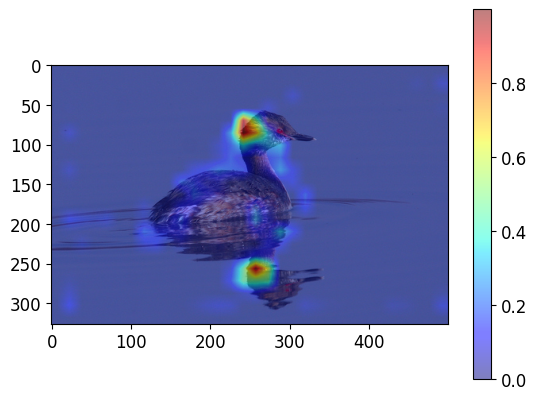


<br>

### **RESULTADOS OBTENIDOS TERCERA IMAGEN**

En la tercera imagen obtenida mediante Grad-CAM, el mapa de activación muestra una distribución más dispersa de las activaciones. Aunque el pájaro sigue siendo visible, las áreas en rojo y naranja, que indican las regiones de mayor relevancia, no están claramente concentradas en el cuerpo o la cabeza del pájaro, sino que se distribuyen también por el fondo, especialmente en las ramas y hojas que rodean al pájaro. Esto sugiere que el modelo está prestando atención tanto al objeto de interés como a elementos de fondo, lo que podría llevar a una interpretación errónea de la imagen.

Parece estar sobreajustado al contexto del fondo, basando su decisión en patrones como las ramas o las hojas que aparecen repetidamente en el entorno, lo cual puede ser un indicativo de que el modelo está utilizando información irrelevante para clasificar la imagen. Esto resalta una posible debilidad en el modelo, ya que debería enfocarse más en las características del pájaro, en lugar de ser influenciado por el entorno.

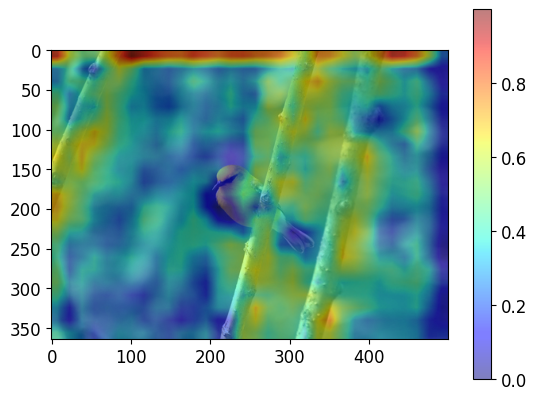